In [15]:
import os
from dotenv import load_dotenv
import praw

# .env 파일 불러오기
load_dotenv()

# 환경변수에서 값 읽기
client_id = os.getenv("REDDIT_CLIENT_ID")
client_secret = os.getenv("REDDIT_CLIENT_SECRET")
username = os.getenv("REDDIT_USERNAME")
password = os.getenv("REDDIT_PASSWORD")

# Reddit API 연결
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent="yj_beauty_analysis by u/{}".format(username),
    username=username,
    password=password
)

# print(reddit.user.me())

In [ ]:
SUBREDDIT_NAME = "kbeauty"  # 분석하려는 서브레딧 이름
LIMIT = 100  # 가져올 게시글 수 (최대 1000개까지 가능하지만, 한 번에 너무 많이 가져오지 않도록 주의)

# 특정 서브레딧 객체 지정
subreddit = reddit.subreddit(SUBREDDIT_NAME)

print(f"--- r/{SUBREDDIT_NAME} 의 인기 게시글 {LIMIT}개 수집 시작 ---")

# 'hot' 게시글을 순회하며 데이터 수집
for submission in subreddit.hot(limit=LIMIT):
    # 게시글 제목과 URL 출력
    print(f"\n[제목] {submission.title}")
    print(f"[URL] {submission.url}")
    print(f"[점수] {submission.score} | [댓글] {submission.num_comments}")
    print("---------------------------------")
    
    # 여기서 더 나아가 댓글까지 수집할 수 있어
    # submission.comments.replace_more(limit=0) # '더 보기' 댓글 제거
    # for top_comment in submission.comments.list()[:3]: # 상위 3개 댓글만 출력
    #     print(f"    [댓글] {top_comment.body}")

--- r/kbeauty 의 인기 게시글 100개 수집 시작 ---

[제목] Ancci Brushes experience?
[URL] https://www.reddit.com/r/kbeauty/comments/1om98ll/ancci_brushes_experience/
[점수] 1 | [댓글] 0
---------------------------------

[제목] Best Korean day moisturisers of 2025?
[URL] https://www.reddit.com/r/kbeauty/comments/1olxqvi/best_korean_day_moisturisers_of_2025/
[점수] 5 | [댓글] 5
---------------------------------

[제목] Yesstyle vs sukoshi mart advent calendar 2025
[URL] https://www.reddit.com/gallery/1olx462
[점수] 3 | [댓글] 0
---------------------------------

[제목] TIRTIR Mask Fit Fixer Spray OR So Natural Setting Spray as an Acne Girlie
[URL] https://www.reddit.com/r/kbeauty/comments/1om5aiv/tirtir_mask_fit_fixer_spray_or_so_natural_setting/
[점수] 1 | [댓글] 0
---------------------------------

[제목] Hince or Heart percent?
[URL] https://www.reddit.com/r/kbeauty/comments/1om1m96/hince_or_heart_percent/
[점수] 0 | [댓글] 0
---------------------------------

[제목] Which eye palette to achieve the attached look?
[URL] https:

In [9]:
SEARCH_TERM = "dalba"
SEARCH_LIMIT = 1000

print(f"--- r/{SUBREDDIT_NAME} 내에서 '{SEARCH_TERM}' 검색 결과 {SEARCH_LIMIT}개 ---")

# .search() 함수 사용
for submission in subreddit.search(query=SEARCH_TERM, limit=SEARCH_LIMIT, sort='new'): # 'new'는 최신순
    print(f"\n[제목] {submission.title}")
    print(f"[작성자] {submission.author}")
    print(f"[텍스트 미리보기] {submission.selftext[:100]}...")
    print(f"[URL] https://reddit.com{submission.permalink}")

    # 댓글 가져오기
    print(f"\n--- 댓글 ({submission.num_comments}개) ---")
    
    # 모든 댓글을 로드 (MoreComments 객체 제거)
    submission.comments.replace_more(limit=0)
    
    # 최상위 댓글만 가져오기
    for comment in submission.comments.list()[:5]:  # 상위 5개만
        if hasattr(comment, 'body'):  # 실제 댓글인지 확인
            print(f"\n  [{comment.author}] {comment.score}점")
            print(f"  {comment.body[:200]}...")  # 댓글 내용 미리보기

--- r/kbeauty 내에서 'dalba' 검색 결과 1000개 ---

[제목] Deinluence/ Influence me
[작성자] Practical-Painting-5
[텍스트 미리보기] I'm warm toned but a little on the pale side rn, I often get hyperpigmentation and have combination ...
[URL] https://reddit.com/r/kbeauty/comments/1mcr7c4/deinluence_influence_me/

--- 댓글 (22개) ---

  [cinnamieroll] 8점
  I have the saem concealer and pot and i love them but I would skip the pot if you have dry skin. I noticed they reallllyy cling onto my rare dry patches really badly...

  [ElectronicDraft4601] 3점
  100% get the saem concealer/color corrector. I really like it for under eyes and random blemishes. I also have the d’Alba sunscreen and while it smells incredible, and the texture is sooo nice, it has...

  [ShowerBig9910] 4점
  the saem concealer pot is great. Just get it!...

  [Counter4301] 5점
  The Saem concealer pot is really good. I have dry skin, but I use it more for correcting my undereyes and other spots that pop up from time to time.As with any concealer

In [ ]:
from transformers import pipeline
import pandas as pd

# 감성분석 모델 로드
# 영어용
sentiment_analyzer_en = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# 한국어용 (선택사항)
# sentiment_analyzer_ko = pipeline("sentiment-analysis", model="matthewburke/korean_sentiment")

SEARCH_TERM = "skincare"
SEARCH_LIMIT = 100

results = []

print(f"--- r/{SUBREDDIT_NAME} 내에서 '{SEARCH_TERM}' 검색 및 감성분석 ---\n")

for submission in subreddit.search(query=SEARCH_TERM, limit=SEARCH_LIMIT, sort='new'):
    print(f"\n{'='*80}")
    print(f"[제목] {submission.title}")
    print(f"[댓글 수] {submission.num_comments}개")
    
    # 댓글 로드
    submission.comments.replace_more(limit=0)
    
    for comment in submission.comments.list()[:10]:  # 상위 10개 댓글
        if hasattr(comment, 'body') and len(comment.body) > 10:  # 너무 짧은 댓글 제외
            try:
                # 감성분석 수행
                sentiment = sentiment_analyzer_en(comment.body[:512])[0]  # 최대 512자
                
                label = sentiment['label']  # POSITIVE or NEGATIVE
                confidence = sentiment['score']  # 확신도 (0~1)
                
                # 결과 저장
                results.append({
                    'post_title': submission.title,
                    'author': str(comment.author),
                    'comment': comment.body[:200],
                    'score': comment.score,
                    'sentiment': label,
                    'confidence': round(confidence, 3)
                })
                
                # 이모지로 표시
                emoji = "😊" if label == "POSITIVE" else "😞"
                print(f"\n{emoji} [{comment.author}] (점수: {comment.score})")
                print(f"   감성: {label} ({confidence:.2%} 확신도)")
                print(f"   내용: {comment.body[:150]}...")
                
            except Exception as e:
                print(f"   [오류] {e}")
                continue

# 결과를 DataFrame으로 변환
df = pd.DataFrame(results)

# 통계 출력
print(f"\n{'='*80}")
print(f"총 분석된 댓글: {len(df)}개")
print(f"긍정(POSITIVE): {len(df[df['sentiment']=='POSITIVE'])}개 ({len(df[df['sentiment']=='POSITIVE'])/len(df)*100:.1f}%)")
print(f"부정(NEGATIVE): {len(df[df['sentiment']=='NEGATIVE'])}개 ({len(df[df['sentiment']=='NEGATIVE'])/len(df)*100:.1f}%)")
print(f"\n평균 확신도: {df['confidence'].mean():.2%}")

# CSV로 저장
df.to_csv('reddit_sentiment_analysis.csv', index=False, encoding='utf-8-sig')
print(f"\n결과가 'reddit_sentiment_analysis.csv'에 저장되었습니다.")

Device set to use mps:0


--- r/kbeauty 내에서 'dalba' 검색 및 감성분석 ---


[제목] Deinluence/ Influence me
[댓글 수] 22개

😞 [cinnamieroll] (점수: 8)
   감성: NEGATIVE (99.93% 확신도)
   내용: I have the saem concealer and pot and i love them but I would skip the pot if you have dry skin. I noticed they reallllyy cling onto my rare dry patch...

😊 [ElectronicDraft4601] (점수: 5)
   감성: POSITIVE (99.81% 확신도)
   내용: 100% get the saem concealer/color corrector. I really like it for under eyes and random blemishes. I also have the d’Alba sunscreen and while it smell...

😊 [ShowerBig9910] (점수: 4)
   감성: POSITIVE (99.86% 확신도)
   내용: the saem concealer pot is great. Just get it!...

😞 [Counter4301] (점수: 4)
   감성: NEGATIVE (90.97% 확신도)
   내용: The Saem concealer pot is really good. I have dry skin, but I use it more for correcting my undereyes and other spots that pop up from time to time.As...

😞 [lowkeytad] (점수: 3)
   감성: NEGATIVE (98.28% 확신도)
   내용: the saem pot is great on some days i started using it instead of concealer however on other 

In [ ]:
# 키워드 트렌드분석(시간대별 언급량)
ANALYSIS_MODE = "keyword_trend"
SEARCH_TERM = "skincare"
SEARCH_LIMIT = 100
TIME_FILTER = "month"

# 감성분석(긍정/부정)
ANALYSIS_MODE = "sentiment"
SEARCH_TERM = "korean skincare"
FILTER_KEYWORDS = ['dalba', 'cosrx']

# 브랜드 비교 분석
ANALYSIS_MODE = "brand_comparison"
BRANDS_TO_COMPARE = ['dalba', 'cosrx', 'laneige', 'innisfree']

# 트렌드 토픽 분석
ANALYSIS_MODE = "trending_topics"
TOP_N_KEYWORDS = 20

In [16]:
from transformers import pipeline
import pandas as pd
import re
from collections import Counter
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================
# 설정 영역 (여기만 수정하세요!)
# ============================================


# 분석 모드 선택
ANALYSIS_MODE = "keyword_trend"  # 옵션: "keyword_trend", "sentiment", "brand_comparison", "trending_topics"

# 기본 설정
SUBREDDIT_NAME = "kbeauty" # 분석할 서브레딧
SEARCH_TERM = "skincare"  # 검색어 (trending_topics 모드에서는 무시됨)
SEARCH_LIMIT = 100  # 가져올 게시글 수
TIME_FILTER = "month"  # "day", "week", "month", "year", "all"

# 키워드 필터링 (sentiment 모드에서 사용)
FILTER_KEYWORDS = ['dalba', "d'alba", 'white truffle']
EXCLUDE_KEYWORDS = []  # 제외할 키워드

# 브랜드 비교 분석 (brand_comparison 모드에서 사용)
BRANDS_TO_COMPARE = ['dalba', 'cosrx', 'laneige', 'innisfree']

# 트렌딩 토픽 분석 설정 (trending_topics 모드에서 사용)
TOP_N_KEYWORDS = 20  # 상위 N개 키워드
MIN_KEYWORD_LENGTH = 3  # 최소 키워드 길이

# ============================================
# 함수 정의
# ============================================

def contains_keywords(text, keywords):
    """키워드 포함 여부 확인"""
    text_lower = text.lower()
    return any(keyword.lower() in text_lower for keyword in keywords)

def extract_keywords(text, min_length=3):
    """텍스트에서 키워드 추출 (명사/형용사 중심)"""
    # 특수문자 제거 및 소문자 변환
    text = re.sub(r'[^\w\s]', ' ', text.lower())
    words = text.split()
    
    # 불용어 제거 (기본적인 것만)
    stopwords = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 
                 'of', 'with', 'by', 'from', 'as', 'is', 'was', 'are', 'were', 'been',
                 'be', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would',
                 'could', 'should', 'may', 'might', 'can', 'it', 'this', 'that',
                 'my', 'your', 'i', 'you', 'me', 'they', 'them', 'their'}
    
    keywords = [w for w in words if len(w) >= min_length and w not in stopwords]
    return keywords

def analyze_keyword_trend(subreddit, search_term, limit, time_filter):
    """키워드 트렌드 분석"""
    print(f"\n📈 키워드 '{search_term}' 트렌드 분석 중...")
    
    results = []
    
    for submission in subreddit.search(query=search_term, limit=limit, sort='new', time_filter=time_filter):
        created_date = datetime.fromtimestamp(submission.created_utc)
        
        results.append({
            'date': created_date.date(),
            'title': submission.title,
            'score': submission.score,
            'num_comments': submission.num_comments,
            'url': f"https://reddit.com{submission.permalink}"
        })
    
    df = pd.DataFrame(results)
    
    if len(df) == 0:
        print("⚠️ 검색 결과가 없습니다.")
        return df
    
    # 일자별 집계
    daily_stats = df.groupby('date').agg({
        'title': 'count',
        'score': 'sum',
        'num_comments': 'sum'
    }).rename(columns={'title': 'post_count'})
    
    print(f"\n총 게시글: {len(df)}개")
    print(f"기간: {df['date'].min()} ~ {df['date'].max()}")
    print(f"평균 점수: {df['score'].mean():.1f}")
    print(f"평균 댓글 수: {df['num_comments'].mean():.1f}")
    
    return df, daily_stats

def analyze_sentiment(subreddit, search_term, limit, filter_keywords, exclude_keywords):
    """감성 분석"""
    print(f"\n😊😞 '{search_term}' 감성 분석 중...")
    
    sentiment_analyzer = pipeline("sentiment-analysis", 
                                 model="distilbert-base-uncased-finetuned-sst-2-english")
    
    results = []
    
    for submission in subreddit.search(query=search_term, limit=limit, sort='new'):
        submission.comments.replace_more(limit=0)
        
        for comment in submission.comments.list():
            if hasattr(comment, 'body') and len(comment.body) > 10:
                # 필터링
                if filter_keywords and not contains_keywords(comment.body, filter_keywords):
                    continue
                if exclude_keywords and contains_keywords(comment.body, exclude_keywords):
                    continue
                
                try:
                    sentiment = sentiment_analyzer(comment.body[:512])[0]
                    
                    results.append({
                        'post_title': submission.title,
                        'author': str(comment.author),
                        'comment': comment.body[:200],
                        'score': comment.score,
                        'sentiment': sentiment['label'],
                        'confidence': round(sentiment['score'], 3),
                        'date': datetime.fromtimestamp(comment.created_utc).date()
                    })
                except Exception as e:
                    continue
    
    df = pd.DataFrame(results)
    
    if len(df) == 0:
        print("⚠️ 분석할 댓글이 없습니다.")
        return df
    
    print(f"\n총 분석된 댓글: {len(df)}개")
    print(f"긍정(POSITIVE): {len(df[df['sentiment']=='POSITIVE'])}개 ({len(df[df['sentiment']=='POSITIVE'])/len(df)*100:.1f}%)")
    print(f"부정(NEGATIVE): {len(df[df['sentiment']=='NEGATIVE'])}개 ({len(df[df['sentiment']=='NEGATIVE'])/len(df)*100:.1f}%)")
    print(f"평균 확신도: {df['confidence'].mean():.2%}")
    
    return df

def compare_brands(subreddit, brands, limit):
    """브랜드 비교 분석"""
    print(f"\n🏷️ 브랜드 비교 분석 중: {brands}")
    
    brand_stats = []
    
    for brand in brands:
        mentions = 0
        total_score = 0
        total_comments = 0
        
        for submission in subreddit.search(query=brand, limit=limit, sort='new'):
            mentions += 1
            total_score += submission.score
            total_comments += submission.num_comments
        
        brand_stats.append({
            'brand': brand,
            'mentions': mentions,
            'avg_score': total_score / mentions if mentions > 0 else 0,
            'avg_comments': total_comments / mentions if mentions > 0 else 0
        })
        
        print(f"  {brand}: {mentions}개 게시글")
    
    df = pd.DataFrame(brand_stats)
    return df

def analyze_trending_topics(subreddit, limit, top_n, min_length):
    """트렌딩 토픽 분석"""
    print(f"\n🔥 트렌딩 토픽 분석 중 (상위 {top_n}개)...")
    
    all_keywords = []
    
    for submission in subreddit.hot(limit=limit):
        # 제목과 본문에서 키워드 추출
        text = submission.title + " " + submission.selftext
        keywords = extract_keywords(text, min_length)
        all_keywords.extend(keywords)
        
        # 댓글에서도 키워드 추출 (상위 5개 댓글만)
        submission.comments.replace_more(limit=0)
        for comment in submission.comments.list()[:5]:
            if hasattr(comment, 'body'):
                keywords = extract_keywords(comment.body, min_length)
                all_keywords.extend(keywords)
    
    # 키워드 빈도 분석
    keyword_counts = Counter(all_keywords)
    top_keywords = keyword_counts.most_common(top_n)
    
    print(f"\n상위 {top_n}개 트렌딩 키워드:")
    for i, (keyword, count) in enumerate(top_keywords, 1):
        print(f"  {i}. {keyword}: {count}회")
    
    df = pd.DataFrame(top_keywords, columns=['keyword', 'count'])
    return df

# ============================================
# 메인 실행
# ============================================

# Reddit 연결 (이미 연결되어 있다고 가정)
subreddit = reddit.subreddit(SUBREDDIT_NAME)

print(f"{'='*80}")
print(f"Reddit 트렌드 분석 시작")
print(f"서브레딧: r/{SUBREDDIT_NAME}")
print(f"분석 모드: {ANALYSIS_MODE}")
print(f"{'='*80}")

# 분석 모드에 따라 실행
if ANALYSIS_MODE == "keyword_trend":
    df, daily_stats = analyze_keyword_trend(subreddit, SEARCH_TERM, SEARCH_LIMIT, TIME_FILTER)
    df.to_csv('keyword_trend_analysis.csv', index=False, encoding='utf-8-sig')
    daily_stats.to_csv('daily_stats.csv', encoding='utf-8-sig')
    print(f"\n✅ 결과 저장: keyword_trend_analysis.csv, daily_stats.csv")

elif ANALYSIS_MODE == "sentiment":
    df = analyze_sentiment(subreddit, SEARCH_TERM, SEARCH_LIMIT, FILTER_KEYWORDS, EXCLUDE_KEYWORDS)
    df.to_csv('sentiment_analysis.csv', index=False, encoding='utf-8-sig')
    print(f"\n✅ 결과 저장: sentiment_analysis.csv")

elif ANALYSIS_MODE == "brand_comparison":
    df = compare_brands(subreddit, BRANDS_TO_COMPARE, SEARCH_LIMIT)
    df.to_csv('brand_comparison.csv', index=False, encoding='utf-8-sig')
    print(f"\n✅ 결과 저장: brand_comparison.csv")

elif ANALYSIS_MODE == "trending_topics":
    df = analyze_trending_topics(subreddit, SEARCH_LIMIT, TOP_N_KEYWORDS, MIN_KEYWORD_LENGTH)
    df.to_csv('trending_topics.csv', index=False, encoding='utf-8-sig')
    print(f"\n✅ 결과 저장: trending_topics.csv")

else:
    print(f"⚠️ 알 수 없는 분석 모드: {ANALYSIS_MODE}")

print(f"\n{'='*80}")
print("분석 완료!")
print(f"{'='*80}")

Reddit 트렌드 분석 시작
서브레딧: r/kbeauty
분석 모드: keyword_trend

📈 키워드 'skincare' 트렌드 분석 중...

총 게시글: 26개
기간: 2025-10-03 ~ 2025-11-03
평균 점수: 21.8
평균 댓글 수: 8.8

✅ 결과 저장: keyword_trend_analysis.csv, daily_stats.csv

분석 완료!


In [17]:
from transformers import pipeline
import pandas as pd
from datetime import datetime
import time

# ============================================
# 설정 영역
# ============================================

# 이전 분석 결과 파일
INPUT_FILE = "keyword_trend_analysis.csv"  # 이전에 생성된 파일

# 댓글 분석 설정
MAX_COMMENTS_PER_POST = 50  # 게시글당 최대 댓글 수
ENABLE_SENTIMENT = True  # 감성분석 활성화
MIN_COMMENT_LENGTH = 10  # 최소 댓글 길이

# 필터링 설정 (선택사항)
FILTER_KEYWORDS = []  # 특정 키워드만 분석하려면: ['dalba', 'skincare']
EXCLUDE_KEYWORDS = []  # 제외할 키워드

# API 호출 제한 방지
DELAY_BETWEEN_POSTS = 2  # 게시글 간 대기 시간 (초)

# ============================================
# 초기화
# ============================================

print("🔄 이전 분석 결과 로딩 중...")
df_posts = pd.read_csv(INPUT_FILE)
print(f"✅ {len(df_posts)}개 게시글 로드 완료")

if ENABLE_SENTIMENT:
    print("🔄 감성분석 모델 로딩 중...")
    sentiment_analyzer = pipeline("sentiment-analysis", 
                                 model="distilbert-base-uncased-finetuned-sst-2-english")
    print("✅ 모델 로딩 완료\n")

# ============================================
# 함수 정의
# ============================================

def contains_keywords(text, keywords):
    """키워드 포함 여부 확인"""
    if not keywords:
        return True
    text_lower = text.lower()
    return any(keyword.lower() in text_lower for keyword in keywords)

def analyze_sentiment(text):
    """감성 분석"""
    if not ENABLE_SENTIMENT:
        return None, None
    
    try:
        result = sentiment_analyzer(text[:512])[0]
        return result['label'], round(result['score'], 3)
    except:
        return None, None

def extract_post_id_from_url(url):
    """URL에서 게시글 ID 추출"""
    # URL 형식: https://reddit.com/r/subreddit/comments/POST_ID/...
    import re
    match = re.search(r'/comments/([a-z0-9]+)/', url)
    if match:
        return match.group(1)
    return None

# ============================================
# 댓글 분석 메인 로직
# ============================================

print(f"{'='*80}")
print(f"📝 댓글 분석 시작")
print(f"대상 게시글: {len(df_posts)}개")
print(f"게시글당 최대 댓글: {MAX_COMMENTS_PER_POST}개")
if FILTER_KEYWORDS:
    print(f"필터링 키워드: {FILTER_KEYWORDS}")
print(f"{'='*80}\n")

all_comments = []
processed_count = 0
error_count = 0

for idx, row in df_posts.iterrows():
    processed_count += 1
    
    try:
        # URL에서 게시글 ID 추출
        post_id = extract_post_id_from_url(row['url'])
        if not post_id:
            print(f"⚠️ [{processed_count}/{len(df_posts)}] URL 파싱 실패: {row['title'][:50]}")
            error_count += 1
            continue
        
        # 게시글 가져오기
        submission = reddit.submission(id=post_id)
        
        print(f"\n📄 [{processed_count}/{len(df_posts)}] {submission.title[:60]}...")
        print(f"   댓글 수: {submission.num_comments}개")
        
        # 댓글 로드
        submission.comments.replace_more(limit=0)
        
        comment_count = 0
        filtered_count = 0
        
        for comment in submission.comments.list()[:MAX_COMMENTS_PER_POST]:
            if not hasattr(comment, 'body'):
                continue
            
            # 길이 체크
            if len(comment.body) < MIN_COMMENT_LENGTH:
                continue
            
            comment_count += 1
            
            # 키워드 필터링
            if FILTER_KEYWORDS and not contains_keywords(comment.body, FILTER_KEYWORDS):
                continue
            
            if EXCLUDE_KEYWORDS and contains_keywords(comment.body, EXCLUDE_KEYWORDS):
                continue
            
            filtered_count += 1
            
            # 감성 분석
            sentiment, confidence = analyze_sentiment(comment.body)
            
            # 데이터 저장
            comment_data = {
                'post_id': post_id,
                'post_title': submission.title,
                'post_score': submission.score,
                'post_url': row['url'],
                'comment_id': comment.id,
                'comment_author': str(comment.author),
                'comment_body': comment.body,
                'comment_score': comment.score,
                'comment_created': datetime.fromtimestamp(comment.created_utc).isoformat(),
                'sentiment': sentiment,
                'confidence': confidence
            }
            all_comments.append(comment_data)
        
        print(f"   ✓ 분석 완료: {comment_count}개 댓글 중 {filtered_count}개 수집")
        
        # API 제한 방지를 위한 대기
        if processed_count < len(df_posts):
            time.sleep(DELAY_BETWEEN_POSTS)
    
    except Exception as e:
        print(f"   ✗ 오류 발생: {str(e)}")
        error_count += 1
        continue

# ============================================
# 결과 저장 및 통계
# ============================================

print(f"\n{'='*80}")
print(f"📊 분석 완료!")
print(f"{'='*80}")

if all_comments:
    # DataFrame 생성
    df_comments = pd.DataFrame(all_comments)
    
    # CSV 저장
    output_file = "comment_analysis.csv"
    df_comments.to_csv(output_file, index=False, encoding='utf-8-sig')
    
    # 통계 출력
    print(f"\n총 수집된 댓글: {len(df_comments)}개")
    print(f"처리된 게시글: {processed_count}개")
    print(f"오류 발생: {error_count}개")
    
    if ENABLE_SENTIMENT:
        positive = len(df_comments[df_comments['sentiment'] == 'POSITIVE'])
        negative = len(df_comments[df_comments['sentiment'] == 'NEGATIVE'])
        total_sentiment = positive + negative
        
        if total_sentiment > 0:
            print(f"\n감성 분석 결과:")
            print(f"  긍정(POSITIVE): {positive}개 ({positive/total_sentiment*100:.1f}%)")
            print(f"  부정(NEGATIVE): {negative}개 ({negative/total_sentiment*100:.1f}%)")
            print(f"  평균 확신도: {df_comments['confidence'].mean():.2%}")
    
    # 게시글별 통계
    print(f"\n게시글별 댓글 수:")
    post_comment_counts = df_comments.groupby('post_title').size().sort_values(ascending=False).head(5)
    for title, count in post_comment_counts.items():
        print(f"  - {title[:60]}... : {count}개")
    
    # 상위 댓글 (점수 기준)
    print(f"\n상위 댓글 (점수 기준):")
    top_comments = df_comments.nlargest(3, 'comment_score')
    for idx, comment in top_comments.iterrows():
        emoji = "😊" if comment['sentiment'] == "POSITIVE" else "😞" if comment['sentiment'] == "NEGATIVE" else "😐"
        print(f"\n  {emoji} [{comment['comment_author']}] 점수: {comment['comment_score']}")
        print(f"     {comment['comment_body'][:100]}...")
        if comment['sentiment']:
            print(f"     감성: {comment['sentiment']} ({comment['confidence']:.0%})")
    
    print(f"\n✅ 결과 저장 완료: {output_file}")
    
    # 게시글별 감성 요약
    if ENABLE_SENTIMENT:
        print(f"\n게시글별 감성 요약 생성 중...")
        post_sentiment = df_comments.groupby('post_title').agg({
            'sentiment': lambda x: (x == 'POSITIVE').sum() / len(x) * 100 if len(x) > 0 else 0,
            'comment_id': 'count',
            'comment_score': 'mean'
        }).rename(columns={
            'sentiment': 'positive_rate',
            'comment_id': 'comment_count',
            'comment_score': 'avg_comment_score'
        }).round(2)
        
        post_sentiment_file = "post_sentiment_summary.csv"
        post_sentiment.to_csv(post_sentiment_file, encoding='utf-8-sig')
        print(f"✅ 게시글별 감성 요약 저장: {post_sentiment_file}")

else:
    print("⚠️ 수집된 댓글이 없습니다.")

print(f"\n{'='*80}\n")

🔄 이전 분석 결과 로딩 중...
✅ 26개 게시글 로드 완료
🔄 감성분석 모델 로딩 중...


Device set to use cpu


✅ 모델 로딩 완료

📝 댓글 분석 시작
대상 게시글: 26개
게시글당 최대 댓글: 50개


📄 [1/26] Please help me :(...
   댓글 수: 2개
   ✓ 분석 완료: 2개 댓글 중 2개 수집

📄 [2/26] Why is korean products so expensive? :(...
   댓글 수: 24개
   ✓ 분석 완료: 17개 댓글 중 17개 수집

📄 [3/26] Desperate to find a foundation/covering cream...
   댓글 수: 2개
   ✓ 분석 완료: 2개 댓글 중 2개 수집

📄 [4/26] Best Korean day moisturisers of 2025?...
   댓글 수: 6개
   ✓ 분석 완료: 4개 댓글 중 4개 수집

📄 [5/26] skincare haul & question...
   댓글 수: 13개
   ✓ 분석 완료: 12개 댓글 중 12개 수집

📄 [6/26] Kbeauty body care suggestions...
   댓글 수: 19개
   ✓ 분석 완료: 16개 댓글 중 16개 수집

📄 [7/26] Experiences with Spicules...
   댓글 수: 2개
   ✓ 분석 완료: 2개 댓글 중 2개 수집

📄 [8/26] What’s the one thing you’d definitely want to buy in Korea?...
   댓글 수: 32개
   ✓ 분석 완료: 29개 댓글 중 29개 수집

📄 [9/26] K-beauty R&D...
   댓글 수: 0개
   ✓ 분석 완료: 0개 댓글 중 0개 수집

📄 [10/26] Has anyone tried these face masks?...
   댓글 수: 0개
   ✓ 분석 완료: 0개 댓글 중 0개 수집

📄 [11/26] Is it worth it to buy skincare directly from KR than trusted...
   댓글 수: 5개
   ✓ 분석

댓글 트렌드 분석 시작
분석 모드: keyword_frequency

📂 데이터 로딩 중: comment_analysis.csv
✅ 203개 댓글 로드 완료

📊 키워드 빈도 분석 중...
✅ 결과 저장: keyword_frequency.csv

✅ 그래프 저장: keyword_frequency.png


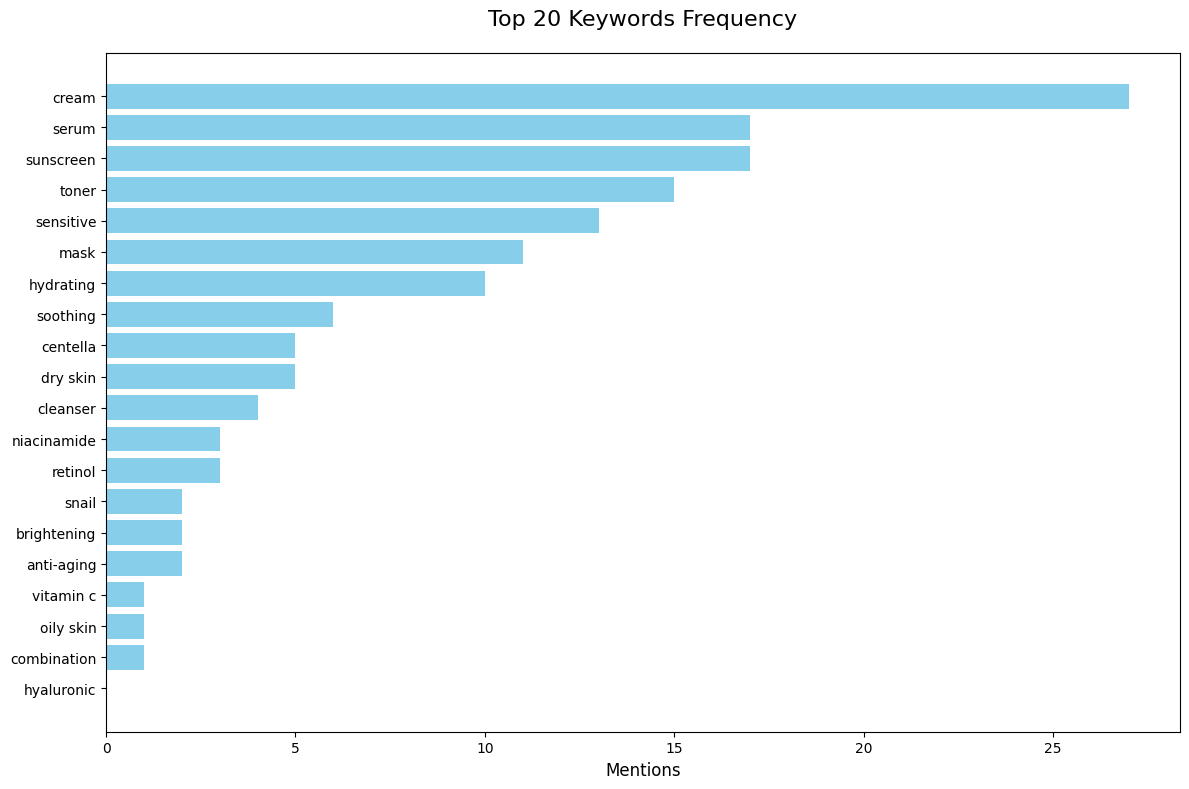


상위 20개 키워드:
   1. cream                :   27회 (13.3%)
   2. serum                :   17회 (8.4%)
   3. sunscreen            :   17회 (8.4%)
   4. toner                :   15회 (7.4%)
   5. sensitive            :   13회 (6.4%)
   6. mask                 :   11회 (5.4%)
   7. hydrating            :   10회 (4.9%)
   8. soothing             :    6회 (3.0%)
   9. centella             :    5회 (2.5%)
  10. dry skin             :    5회 (2.5%)
  11. cleanser             :    4회 (2.0%)
  12. niacinamide          :    3회 (1.5%)
  13. retinol              :    3회 (1.5%)
  14. snail                :    2회 (1.0%)
  15. brightening          :    2회 (1.0%)
  16. anti-aging           :    2회 (1.0%)
  17. vitamin c            :    1회 (0.5%)
  18. oily skin            :    1회 (0.5%)
  19. combination          :    1회 (0.5%)
  20. hyaluronic           :    0회 (0.0%)

분석 완료!


In [20]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

# ============================================
# 설정 영역 (여기만 수정하세요!)
# ============================================

# 분석 모드 선택
ANALYSIS_MODE = "keyword_frequency"  
# 옵션: "wordcloud", "keyword_frequency", "sentiment_keywords", 
#       "time_trend", "cooccurrence", "topic_comparison"

# 입력 파일
INPUT_FILE = "comment_analysis.csv"  # 이전에 생성된 댓글 분석 파일

# 공통 설정
MIN_WORD_LENGTH = 3  # 최소 단어 길이
TOP_N = 20  # 상위 N개 표시
LANGUAGE = "english"  # "english" or "korean"

# 워드클라우드 설정 (wordcloud 모드)
WORDCLOUD_WIDTH = 1200
WORDCLOUD_HEIGHT = 600
WORDCLOUD_BACKGROUND = "white"

# 키워드 빈도 분석 설정 (keyword_frequency 모드)
CUSTOM_KEYWORDS = [
    # 제품 카테고리
    'toner', 'serum', 'cream', 'cleanser', 'mask', 'sunscreen',
    # 성분
    'niacinamide', 'retinol', 'vitamin c', 'hyaluronic', 'snail', 'centella',
    # 피부 타입
    'dry skin', 'oily skin', 'sensitive', 'combination',
    # 효과
    'hydrating', 'brightening', 'anti-aging', 'soothing'
]

# 시간 트렌드 분석 설정 (time_trend 모드)
TIME_PERIOD = "week"  # "day", "week", "month"
COMPARE_KEYWORDS = ['hydrating', 'brightening', 'anti-aging']

# 토픽 비교 설정 (topic_comparison 모드)
TOPIC_GROUPS = {
    'Hydration': ['hydrating', 'moisture', 'dewy', 'plump'],
    'Brightening': ['brightening', 'glow', 'radiant', 'luminous'],
    'Anti-Aging': ['anti-aging', 'wrinkle', 'firm', 'lifting'],
    'Acne': ['acne', 'breakout', 'pimple', 'blemish']
}

# ============================================
# 함수 정의
# ============================================

def load_data():
    """데이터 로드"""
    print(f"📂 데이터 로딩 중: {INPUT_FILE}")
    df = pd.read_csv(INPUT_FILE)
    print(f"✅ {len(df)}개 댓글 로드 완료\n")
    return df

def clean_text(text):
    """텍스트 전처리"""
    if pd.isna(text):
        return ""
    # 소문자 변환, 특수문자 제거
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # URL 제거
    text = re.sub(r'[^\w\s]', ' ', text)  # 특수문자 제거
    return text

def extract_words(text, min_length=3):
    """단어 추출"""
    # 불용어 리스트
    stopwords = {
        'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for',
        'of', 'with', 'by', 'from', 'as', 'is', 'was', 'are', 'were', 'been',
        'be', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would',
        'could', 'should', 'may', 'might', 'can', 'my', 'your', 'their',
        'this', 'that', 'these', 'those', 'i', 'you', 'he', 'she', 'it',
        'we', 'they', 'me', 'him', 'her', 'us', 'them', 'what', 'which',
        'who', 'when', 'where', 'why', 'how', 'all', 'each', 'every',
        'both', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'not',
        'only', 'own', 'same', 'so', 'than', 'too', 'very', 'just', 'really',
        'also', 'like', 'get', 'got', 'use', 'used', 'using', 'one', 'two'
    }
    
    words = clean_text(text).split()
    return [w for w in words if len(w) >= min_length and w not in stopwords]

def analyze_wordcloud(df):
    """워드클라우드 생성"""
    print("☁️  워드클라우드 생성 중...")
    
    try:
        from wordcloud import WordCloud
    except ImportError:
        print("⚠️  wordcloud 라이브러리가 필요합니다: pip install wordcloud")
        return
    
    # 모든 댓글 합치기
    all_text = ' '.join(df['comment_body'].apply(clean_text))
    words = extract_words(all_text, MIN_WORD_LENGTH)
    word_freq = Counter(words)
    
    # 워드클라우드 생성
    wordcloud = WordCloud(
        width=WORDCLOUD_WIDTH,
        height=WORDCLOUD_HEIGHT,
        background_color=WORDCLOUD_BACKGROUND,
        colormap='viridis',
        relative_scaling=0.5,
        min_font_size=10
    ).generate_from_frequencies(word_freq)
    
    # 시각화
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Comment Word Cloud', fontsize=20, pad=20)
    plt.tight_layout()
    plt.savefig('wordcloud.png', dpi=300, bbox_inches='tight')
    print("✅ 워드클라우드 저장: wordcloud.png")
    plt.show()
    
    # 상위 단어 출력
    print(f"\n상위 {TOP_N}개 단어:")
    for i, (word, count) in enumerate(word_freq.most_common(TOP_N), 1):
        print(f"  {i:2d}. {word:20s} : {count:4d}회")

def analyze_keyword_frequency(df):
    """키워드 빈도 분석"""
    print("📊 키워드 빈도 분석 중...")
    
    keyword_counts = {}
    
    for keyword in CUSTOM_KEYWORDS:
        count = 0
        for text in df['comment_body']:
            if pd.notna(text) and keyword.lower() in str(text).lower():
                count += 1
        keyword_counts[keyword] = count
    
    # 정렬
    sorted_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)
    
    # DataFrame 생성
    result_df = pd.DataFrame(sorted_keywords, columns=['keyword', 'count'])
    result_df['percentage'] = (result_df['count'] / len(df) * 100).round(2)
    
    # 저장
    result_df.to_csv('keyword_frequency.csv', index=False, encoding='utf-8-sig')
    print("✅ 결과 저장: keyword_frequency.csv\n")
    
    # 시각화
    top_keywords = result_df.head(TOP_N)
    
    plt.figure(figsize=(12, 8))
    plt.barh(top_keywords['keyword'], top_keywords['count'], color='skyblue')
    plt.xlabel('Mentions', fontsize=12)
    plt.title(f'Top {TOP_N} Keywords Frequency', fontsize=16, pad=20)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('keyword_frequency.png', dpi=300, bbox_inches='tight')
    print("✅ 그래프 저장: keyword_frequency.png")
    plt.show()
    
    # 출력
    print(f"\n상위 {TOP_N}개 키워드:")
    for idx, row in top_keywords.iterrows():
        print(f"  {idx+1:2d}. {row['keyword']:20s} : {row['count']:4d}회 ({row['percentage']:.1f}%)")

def analyze_sentiment_keywords(df):
    """긍정/부정 키워드 분석"""
    print("😊😞 감성별 키워드 분석 중...")
    
    if 'sentiment' not in df.columns:
        print("⚠️  감성 분석 데이터가 없습니다.")
        return
    
    positive_comments = df[df['sentiment'] == 'POSITIVE']['comment_body']
    negative_comments = df[df['sentiment'] == 'NEGATIVE']['comment_body']
    
    # 긍정 키워드
    positive_text = ' '.join(positive_comments.apply(clean_text))
    positive_words = extract_words(positive_text, MIN_WORD_LENGTH)
    positive_freq = Counter(positive_words).most_common(TOP_N)
    
    # 부정 키워드
    negative_text = ' '.join(negative_comments.apply(clean_text))
    negative_words = extract_words(negative_text, MIN_WORD_LENGTH)
    negative_freq = Counter(negative_words).most_common(TOP_N)
    
    # 결과 저장
    result_df = pd.DataFrame({
        'positive_keyword': [w for w, c in positive_freq],
        'positive_count': [c for w, c in positive_freq],
        'negative_keyword': [w for w, c in negative_freq],
        'negative_count': [c for w, c in negative_freq]
    })
    result_df.to_csv('sentiment_keywords.csv', index=False, encoding='utf-8-sig')
    print("✅ 결과 저장: sentiment_keywords.csv\n")
    
    # 시각화
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # 긍정 키워드
    pos_words = [w for w, c in positive_freq[:15]]
    pos_counts = [c for w, c in positive_freq[:15]]
    ax1.barh(pos_words, pos_counts, color='lightgreen')
    ax1.set_xlabel('Frequency', fontsize=12)
    ax1.set_title('Positive Keywords', fontsize=14, color='green')
    ax1.invert_yaxis()
    
    # 부정 키워드
    neg_words = [w for w, c in negative_freq[:15]]
    neg_counts = [c for w, c in negative_freq[:15]]
    ax2.barh(neg_words, neg_counts, color='lightcoral')
    ax2.set_xlabel('Frequency', fontsize=12)
    ax2.set_title('Negative Keywords', fontsize=14, color='red')
    ax2.invert_yaxis()
    
    plt.tight_layout()
    plt.savefig('sentiment_keywords.png', dpi=300, bbox_inches='tight')
    print("✅ 그래프 저장: sentiment_keywords.png")
    plt.show()
    
    # 출력
    print(f"\n😊 긍정 키워드 TOP {TOP_N}:")
    for i, (word, count) in enumerate(positive_freq, 1):
        print(f"  {i:2d}. {word:20s} : {count:4d}회")
    
    print(f"\n😞 부정 키워드 TOP {TOP_N}:")
    for i, (word, count) in enumerate(negative_freq, 1):
        print(f"  {i:2d}. {word:20s} : {count:4d}회")

def analyze_time_trend(df):
    """시간대별 키워드 트렌드"""
    print("📈 시간대별 키워드 트렌드 분석 중...")
    
    if 'comment_created' not in df.columns:
        print("⚠️  날짜 데이터가 없습니다.")
        return
    
    df['date'] = pd.to_datetime(df['comment_created']).dt.date
    
    # 키워드별 시간대별 집계
    trend_data = []
    
    for keyword in COMPARE_KEYWORDS:
        for date in df['date'].unique():
            date_comments = df[df['date'] == date]['comment_body']
            count = sum(1 for text in date_comments if pd.notna(text) and keyword.lower() in str(text).lower())
            trend_data.append({
                'date': date,
                'keyword': keyword,
                'count': count
            })
    
    trend_df = pd.DataFrame(trend_data)
    trend_df.to_csv('time_trend.csv', index=False, encoding='utf-8-sig')
    print("✅ 결과 저장: time_trend.csv\n")
    
    # 시각화
    plt.figure(figsize=(14, 8))
    for keyword in COMPARE_KEYWORDS:
        keyword_data = trend_df[trend_df['keyword'] == keyword]
        plt.plot(keyword_data['date'], keyword_data['count'], marker='o', label=keyword, linewidth=2)
    
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Mentions', fontsize=12)
    plt.title('Keyword Trends Over Time', fontsize=16, pad=20)
    plt.legend(fontsize=10)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('time_trend.png', dpi=300, bbox_inches='tight')
    print("✅ 그래프 저장: time_trend.png")
    plt.show()

def analyze_cooccurrence(df):
    """키워드 공출현 분석"""
    print("🔗 키워드 공출현 분석 중...")
    
    # 상위 키워드 추출
    all_text = ' '.join(df['comment_body'].apply(clean_text))
    words = extract_words(all_text, MIN_WORD_LENGTH)
    top_words = [w for w, c in Counter(words).most_common(30)]
    
    # 공출현 매트릭스 생성
    cooccurrence = np.zeros((len(top_words), len(top_words)))
    
    for text in df['comment_body']:
        if pd.isna(text):
            continue
        comment_words = set(extract_words(str(text), MIN_WORD_LENGTH))
        for i, word1 in enumerate(top_words):
            for j, word2 in enumerate(top_words):
                if word1 in comment_words and word2 in comment_words:
                    cooccurrence[i][j] += 1
    
    # 시각화
    plt.figure(figsize=(14, 12))
    sns.heatmap(cooccurrence, xticklabels=top_words, yticklabels=top_words, 
                cmap='YlOrRd', annot=False, fmt='g', cbar_kws={'label': 'Co-occurrence Count'})
    plt.title('Keyword Co-occurrence Matrix', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('cooccurrence.png', dpi=300, bbox_inches='tight')
    print("✅ 그래프 저장: cooccurrence.png")
    plt.show()
    
    # 가장 강한 연관성 출력
    print(f"\n상위 {TOP_N}개 키워드 조합:")
    pairs = []
    for i in range(len(top_words)):
        for j in range(i+1, len(top_words)):
            if cooccurrence[i][j] > 0:
                pairs.append((top_words[i], top_words[j], cooccurrence[i][j]))
    
    pairs.sort(key=lambda x: x[2], reverse=True)
    for idx, (word1, word2, count) in enumerate(pairs[:TOP_N], 1):
        print(f"  {idx:2d}. {word1} + {word2}: {int(count)}회")

def analyze_topic_comparison(df):
    """토픽 그룹 비교 분석"""
    print("🏷️  토픽 그룹 비교 분석 중...")
    
    topic_stats = []
    
    for topic, keywords in TOPIC_GROUPS.items():
        mentions = 0
        positive = 0
        negative = 0
        total_score = 0
        
        for idx, row in df.iterrows():
            text = str(row['comment_body']).lower()
            if any(kw.lower() in text for kw in keywords):
                mentions += 1
                total_score += row.get('comment_score', 0)
                
                if 'sentiment' in df.columns:
                    if row['sentiment'] == 'POSITIVE':
                        positive += 1
                    elif row['sentiment'] == 'NEGATIVE':
                        negative += 1
        
        topic_stats.append({
            'topic': topic,
            'mentions': mentions,
            'positive': positive,
            'negative': negative,
            'positive_rate': (positive / mentions * 100) if mentions > 0 else 0,
            'avg_score': (total_score / mentions) if mentions > 0 else 0
        })
    
    result_df = pd.DataFrame(topic_stats)
    result_df.to_csv('topic_comparison.csv', index=False, encoding='utf-8-sig')
    print("✅ 결과 저장: topic_comparison.csv\n")
    
    # 시각화
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # 언급 빈도
    ax1.bar(result_df['topic'], result_df['mentions'], color='steelblue')
    ax1.set_ylabel('Mentions', fontsize=12)
    ax1.set_title('Topic Mentions', fontsize=14)
    ax1.tick_params(axis='x', rotation=45)
    
    # 긍정률
    ax2.bar(result_df['topic'], result_df['positive_rate'], color='lightgreen')
    ax2.set_ylabel('Positive Rate (%)', fontsize=12)
    ax2.set_title('Topic Sentiment', fontsize=14)
    ax2.tick_params(axis='x', rotation=45)
    ax2.set_ylim(0, 100)
    
    plt.tight_layout()
    plt.savefig('topic_comparison.png', dpi=300, bbox_inches='tight')
    print("✅ 그래프 저장: topic_comparison.png")
    plt.show()
    
    # 출력
    print("\n토픽별 통계:")
    for idx, row in result_df.iterrows():
        print(f"\n  {row['topic']}:")
        print(f"    언급: {row['mentions']}회")
        print(f"    긍정률: {row['positive_rate']:.1f}%")
        print(f"    평균 점수: {row['avg_score']:.2f}")

# ============================================
# 메인 실행
# ============================================

print(f"{'='*80}")
print(f"댓글 트렌드 분석 시작")
print(f"분석 모드: {ANALYSIS_MODE}")
print(f"{'='*80}\n")

# 데이터 로드
df = load_data()

# 분석 모드에 따라 실행
if ANALYSIS_MODE == "wordcloud":
    analyze_wordcloud(df)

elif ANALYSIS_MODE == "keyword_frequency":
    analyze_keyword_frequency(df)

elif ANALYSIS_MODE == "sentiment_keywords":
    analyze_sentiment_keywords(df)

elif ANALYSIS_MODE == "time_trend":
    analyze_time_trend(df)

elif ANALYSIS_MODE == "cooccurrence":
    analyze_cooccurrence(df)

elif ANALYSIS_MODE == "topic_comparison":
    analyze_topic_comparison(df)

else:
    print(f"⚠️  알 수 없는 분석 모드: {ANALYSIS_MODE}")

print(f"\n{'='*80}")
print("분석 완료!")
print(f"{'='*80}")

댓글 트렌드 분석 시작
분석 모드: keyword_frequency

📂 데이터 로딩 중: comment_analysis.csv
✅ 203개 댓글 로드 완료

📊 키워드 빈도 분석 중...
✅ 결과 저장: keyword_frequency.csv

✅ 그래프 저장: keyword_frequency.png


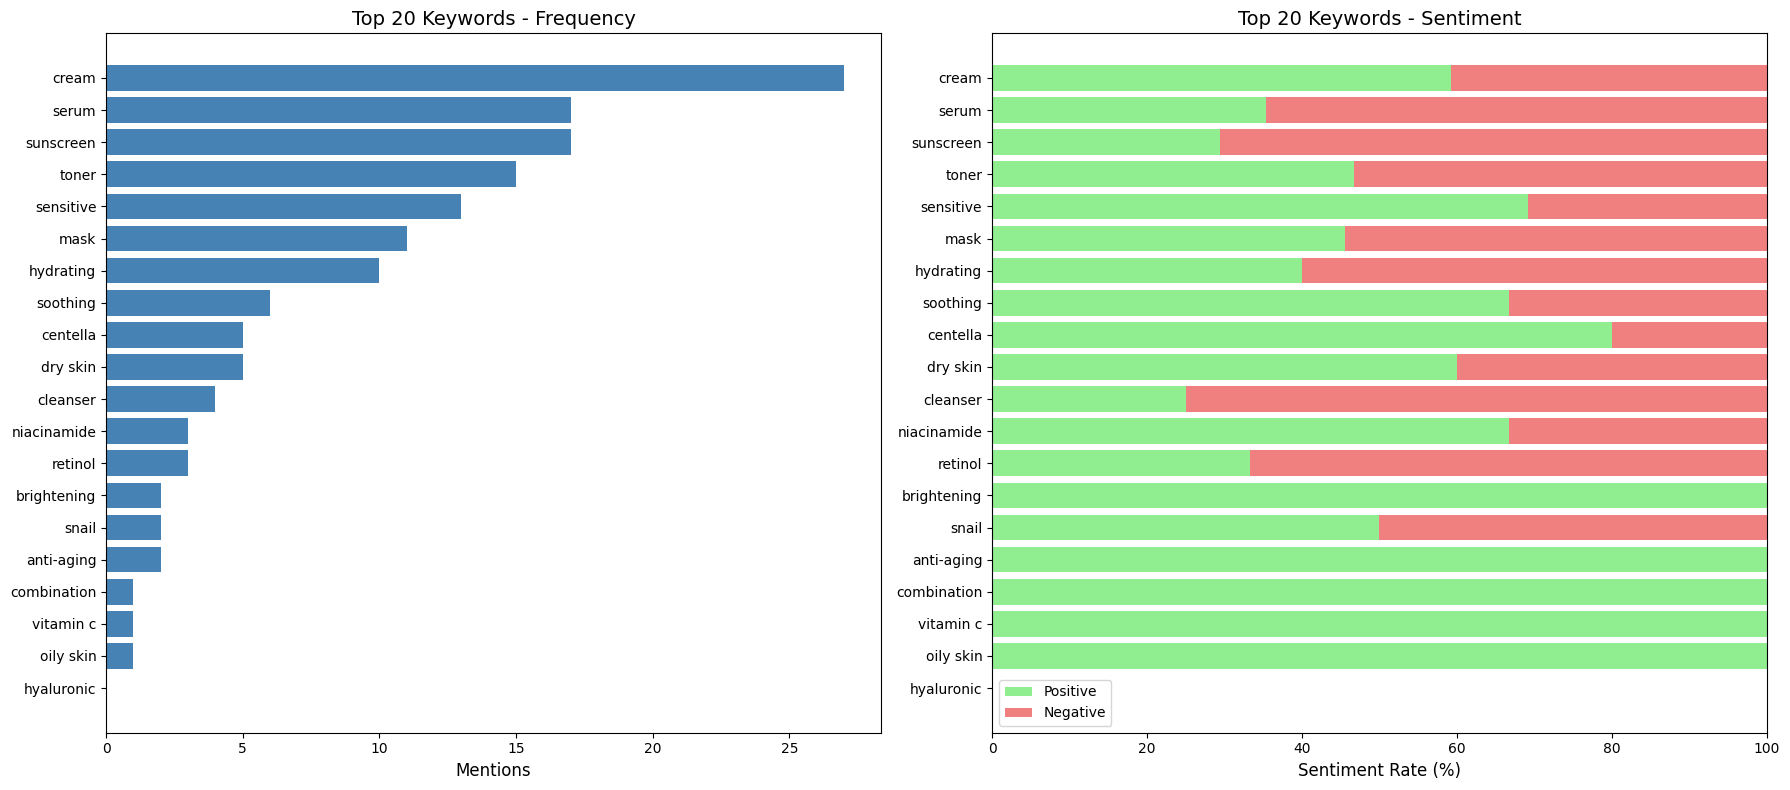


상위 20개 키워드 (감성 분석 포함):
  😐 cream               
     언급:  27회 (13.3%) | 평균점수: 2.7
     긍정:  59.3% | 부정:  40.7%
  😞 serum               
     언급:  17회 (8.4%) | 평균점수: 1.4
     긍정:  35.3% | 부정:  64.7%
  😞 sunscreen           
     언급:  17회 (8.4%) | 평균점수: 2.2
     긍정:  29.4% | 부정:  70.6%
  😐 toner               
     언급:  15회 (7.4%) | 평균점수: 1.8
     긍정:  46.7% | 부정:  53.3%
  😊 sensitive           
     언급:  13회 (6.4%) | 평균점수: 1.5
     긍정:  69.2% | 부정:  30.8%
  😐 mask                
     언급:  11회 (5.4%) | 평균점수: 2.2
     긍정:  45.5% | 부정:  54.5%
  😞 hydrating           
     언급:  10회 (4.9%) | 평균점수: 1.6
     긍정:  40.0% | 부정:  60.0%
  😊 soothing            
     언급:   6회 (3.0%) | 평균점수: 1.3
     긍정:  66.7% | 부정:  33.3%
  😊 centella            
     언급:   5회 (2.5%) | 평균점수: 2.4
     긍정:  80.0% | 부정:  20.0%
  😐 dry skin            
     언급:   5회 (2.5%) | 평균점수: 4.4
     긍정:  60.0% | 부정:  40.0%
  😞 cleanser            
     언급:   4회 (2.0%) | 평균점수: 1.5
     긍정:  25.0% | 부정:  75.0%
  😊 niacinamide   

In [21]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

# ============================================
# 설정 영역 (여기만 수정하세요!)
# ============================================

# 분석 모드 선택
ANALYSIS_MODE = "keyword_frequency"  
# 옵션: "wordcloud", "keyword_frequency", "sentiment_keywords", 
#       "time_trend", "cooccurrence", "topic_comparison"

# 입력 파일
INPUT_FILE = "comment_analysis.csv"  # 이전에 생성된 댓글 분석 파일

# 공통 설정
MIN_WORD_LENGTH = 3  # 최소 단어 길이
TOP_N = 20  # 상위 N개 표시
LANGUAGE = "english"  # "english" or "korean"

# 워드클라우드 설정 (wordcloud 모드)
WORDCLOUD_WIDTH = 1200
WORDCLOUD_HEIGHT = 600
WORDCLOUD_BACKGROUND = "white"

# 키워드 빈도 분석 설정 (keyword_frequency 모드)
CUSTOM_KEYWORDS = [
    # 제품 카테고리
    'toner', 'serum', 'cream', 'cleanser', 'mask', 'sunscreen',
    # 성분
    'niacinamide', 'retinol', 'vitamin c', 'hyaluronic', 'snail', 'centella',
    # 피부 타입
    'dry skin', 'oily skin', 'sensitive', 'combination',
    # 효과
    'hydrating', 'brightening', 'anti-aging', 'soothing'
]

# 시간 트렌드 분석 설정 (time_trend 모드)
TIME_PERIOD = "week"  # "day", "week", "month"
COMPARE_KEYWORDS = ['hydrating', 'brightening', 'anti-aging']

# 토픽 비교 설정 (topic_comparison 모드)
TOPIC_GROUPS = {
    'Hydration': ['hydrating', 'moisture', 'dewy', 'plump'],
    'Brightening': ['brightening', 'glow', 'radiant', 'luminous'],
    'Anti-Aging': ['anti-aging', 'wrinkle', 'firm', 'lifting'],
    'Acne': ['acne', 'breakout', 'pimple', 'blemish']
}

# ============================================
# 함수 정의
# ============================================

def load_data():
    """데이터 로드"""
    print(f"📂 데이터 로딩 중: {INPUT_FILE}")
    df = pd.read_csv(INPUT_FILE)
    print(f"✅ {len(df)}개 댓글 로드 완료\n")
    return df

def clean_text(text):
    """텍스트 전처리"""
    if pd.isna(text):
        return ""
    # 소문자 변환, 특수문자 제거
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # URL 제거
    text = re.sub(r'[^\w\s]', ' ', text)  # 특수문자 제거
    return text

def extract_words(text, min_length=3):
    """단어 추출"""
    # 불용어 리스트
    stopwords = {
        'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for',
        'of', 'with', 'by', 'from', 'as', 'is', 'was', 'are', 'were', 'been',
        'be', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would',
        'could', 'should', 'may', 'might', 'can', 'my', 'your', 'their',
        'this', 'that', 'these', 'those', 'i', 'you', 'he', 'she', 'it',
        'we', 'they', 'me', 'him', 'her', 'us', 'them', 'what', 'which',
        'who', 'when', 'where', 'why', 'how', 'all', 'each', 'every',
        'both', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'not',
        'only', 'own', 'same', 'so', 'than', 'too', 'very', 'just', 'really',
        'also', 'like', 'get', 'got', 'use', 'used', 'using', 'one', 'two'
    }
    
    words = clean_text(text).split()
    return [w for w in words if len(w) >= min_length and w not in stopwords]

def analyze_wordcloud(df):
    """워드클라우드 생성"""
    print("☁️  워드클라우드 생성 중...")
    
    try:
        from wordcloud import WordCloud
    except ImportError:
        print("⚠️  wordcloud 라이브러리가 필요합니다: pip install wordcloud")
        return
    
    # 모든 댓글 합치기
    all_text = ' '.join(df['comment_body'].apply(clean_text))
    words = extract_words(all_text, MIN_WORD_LENGTH)
    word_freq = Counter(words)
    
    # 워드클라우드 생성
    wordcloud = WordCloud(
        width=WORDCLOUD_WIDTH,
        height=WORDCLOUD_HEIGHT,
        background_color=WORDCLOUD_BACKGROUND,
        colormap='viridis',
        relative_scaling=0.5,
        min_font_size=10
    ).generate_from_frequencies(word_freq)
    
    # 시각화
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Comment Word Cloud', fontsize=20, pad=20)
    plt.tight_layout()
    plt.savefig('wordcloud.png', dpi=300, bbox_inches='tight')
    print("✅ 워드클라우드 저장: wordcloud.png")
    plt.show()
    
    # 상위 단어 출력
    print(f"\n상위 {TOP_N}개 단어:")
    for i, (word, count) in enumerate(word_freq.most_common(TOP_N), 1):
        print(f"  {i:2d}. {word:20s} : {count:4d}회")

def analyze_keyword_frequency(df):
    """키워드 빈도 분석 (감성 비율 포함)"""
    print("📊 키워드 빈도 분석 중...")
    
    has_sentiment = 'sentiment' in df.columns
    keyword_stats = []
    
    for keyword in CUSTOM_KEYWORDS:
        total_count = 0
        positive_count = 0
        negative_count = 0
        neutral_count = 0
        total_score = 0
        
        for idx, row in df.iterrows():
            text = row['comment_body']
            if pd.notna(text) and keyword.lower() in str(text).lower():
                total_count += 1
                total_score += row.get('comment_score', 0)
                
                if has_sentiment:
                    if row['sentiment'] == 'POSITIVE':
                        positive_count += 1
                    elif row['sentiment'] == 'NEGATIVE':
                        negative_count += 1
                    else:
                        neutral_count += 1
        
        keyword_stats.append({
            'keyword': keyword,
            'count': total_count,
            'percentage': round(total_count / len(df) * 100, 2) if len(df) > 0 else 0,
            'positive': positive_count,
            'negative': negative_count,
            'neutral': neutral_count,
            'positive_rate': round(positive_count / total_count * 100, 1) if total_count > 0 else 0,
            'negative_rate': round(negative_count / total_count * 100, 1) if total_count > 0 else 0,
            'avg_score': round(total_score / total_count, 2) if total_count > 0 else 0
        })
    
    # DataFrame 생성 및 정렬
    result_df = pd.DataFrame(keyword_stats)
    result_df = result_df.sort_values('count', ascending=False)
    
    # 저장
    result_df.to_csv('keyword_frequency.csv', index=False, encoding='utf-8-sig')
    print("✅ 결과 저장: keyword_frequency.csv\n")
    
    # 시각화
    top_keywords = result_df.head(TOP_N)
    
    if has_sentiment:
        # 스택 바 차트 (긍정/부정 비율)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
        
        # 왼쪽: 언급 빈도
        ax1.barh(top_keywords['keyword'], top_keywords['count'], color='steelblue')
        ax1.set_xlabel('Mentions', fontsize=12)
        ax1.set_title(f'Top {TOP_N} Keywords - Frequency', fontsize=14)
        ax1.invert_yaxis()
        
        # 오른쪽: 감성 비율
        y_pos = range(len(top_keywords))
        ax2.barh(y_pos, top_keywords['positive_rate'], color='lightgreen', label='Positive')
        ax2.barh(y_pos, top_keywords['negative_rate'], left=top_keywords['positive_rate'], 
                color='lightcoral', label='Negative')
        ax2.set_yticks(y_pos)
        ax2.set_yticklabels(top_keywords['keyword'])
        ax2.set_xlabel('Sentiment Rate (%)', fontsize=12)
        ax2.set_title(f'Top {TOP_N} Keywords - Sentiment', fontsize=14)
        ax2.set_xlim(0, 100)
        ax2.legend()
        ax2.invert_yaxis()
        
        plt.tight_layout()
        plt.savefig('keyword_frequency.png', dpi=300, bbox_inches='tight')
        print("✅ 그래프 저장: keyword_frequency.png")
        plt.show()
        
        # 출력 (감성 포함)
        print(f"\n상위 {TOP_N}개 키워드 (감성 분석 포함):")
        for idx, row in top_keywords.iterrows():
            emoji = "😊" if row['positive_rate'] > 60 else "😐" if row['positive_rate'] > 40 else "😞"
            print(f"  {emoji} {row['keyword']:20s}")
            print(f"     언급: {row['count']:3d}회 ({row['percentage']:.1f}%) | 평균점수: {row['avg_score']:.1f}")
            print(f"     긍정: {row['positive_rate']:5.1f}% | 부정: {row['negative_rate']:5.1f}%")
    
    else:
        # 감성 데이터 없을 때
        plt.figure(figsize=(12, 8))
        plt.barh(top_keywords['keyword'], top_keywords['count'], color='skyblue')
        plt.xlabel('Mentions', fontsize=12)
        plt.title(f'Top {TOP_N} Keywords Frequency', fontsize=16, pad=20)
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig('keyword_frequency.png', dpi=300, bbox_inches='tight')
        print("✅ 그래프 저장: keyword_frequency.png")
        plt.show()
        
        print(f"\n상위 {TOP_N}개 키워드:")
        for idx, row in top_keywords.iterrows():
            print(f"  {idx+1:2d}. {row['keyword']:20s} : {row['count']:4d}회 ({row['percentage']:.1f}%)")

def analyze_sentiment_keywords(df):
    """긍정/부정 키워드 분석"""
    print("😊😞 감성별 키워드 분석 중...")
    
    if 'sentiment' not in df.columns:
        print("⚠️  감성 분석 데이터가 없습니다.")
        return
    
    positive_comments = df[df['sentiment'] == 'POSITIVE']['comment_body']
    negative_comments = df[df['sentiment'] == 'NEGATIVE']['comment_body']
    
    # 긍정 키워드
    positive_text = ' '.join(positive_comments.apply(clean_text))
    positive_words = extract_words(positive_text, MIN_WORD_LENGTH)
    positive_freq = Counter(positive_words).most_common(TOP_N)
    
    # 부정 키워드
    negative_text = ' '.join(negative_comments.apply(clean_text))
    negative_words = extract_words(negative_text, MIN_WORD_LENGTH)
    negative_freq = Counter(negative_words).most_common(TOP_N)
    
    # 결과 저장
    result_df = pd.DataFrame({
        'positive_keyword': [w for w, c in positive_freq],
        'positive_count': [c for w, c in positive_freq],
        'negative_keyword': [w for w, c in negative_freq],
        'negative_count': [c for w, c in negative_freq]
    })
    result_df.to_csv('sentiment_keywords.csv', index=False, encoding='utf-8-sig')
    print("✅ 결과 저장: sentiment_keywords.csv\n")
    
    # 시각화
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # 긍정 키워드
    pos_words = [w for w, c in positive_freq[:15]]
    pos_counts = [c for w, c in positive_freq[:15]]
    ax1.barh(pos_words, pos_counts, color='lightgreen')
    ax1.set_xlabel('Frequency', fontsize=12)
    ax1.set_title('Positive Keywords', fontsize=14, color='green')
    ax1.invert_yaxis()
    
    # 부정 키워드
    neg_words = [w for w, c in negative_freq[:15]]
    neg_counts = [c for w, c in negative_freq[:15]]
    ax2.barh(neg_words, neg_counts, color='lightcoral')
    ax2.set_xlabel('Frequency', fontsize=12)
    ax2.set_title('Negative Keywords', fontsize=14, color='red')
    ax2.invert_yaxis()
    
    plt.tight_layout()
    plt.savefig('sentiment_keywords.png', dpi=300, bbox_inches='tight')
    print("✅ 그래프 저장: sentiment_keywords.png")
    plt.show()
    
    # 출력
    print(f"\n😊 긍정 키워드 TOP {TOP_N}:")
    for i, (word, count) in enumerate(positive_freq, 1):
        print(f"  {i:2d}. {word:20s} : {count:4d}회")
    
    print(f"\n😞 부정 키워드 TOP {TOP_N}:")
    for i, (word, count) in enumerate(negative_freq, 1):
        print(f"  {i:2d}. {word:20s} : {count:4d}회")

def analyze_time_trend(df):
    """시간대별 키워드 트렌드"""
    print("📈 시간대별 키워드 트렌드 분석 중...")
    
    if 'comment_created' not in df.columns:
        print("⚠️  날짜 데이터가 없습니다.")
        return
    
    df['date'] = pd.to_datetime(df['comment_created']).dt.date
    
    # 키워드별 시간대별 집계
    trend_data = []
    
    for keyword in COMPARE_KEYWORDS:
        for date in df['date'].unique():
            date_comments = df[df['date'] == date]['comment_body']
            count = sum(1 for text in date_comments if pd.notna(text) and keyword.lower() in str(text).lower())
            trend_data.append({
                'date': date,
                'keyword': keyword,
                'count': count
            })
    
    trend_df = pd.DataFrame(trend_data)
    trend_df.to_csv('time_trend.csv', index=False, encoding='utf-8-sig')
    print("✅ 결과 저장: time_trend.csv\n")
    
    # 시각화
    plt.figure(figsize=(14, 8))
    for keyword in COMPARE_KEYWORDS:
        keyword_data = trend_df[trend_df['keyword'] == keyword]
        plt.plot(keyword_data['date'], keyword_data['count'], marker='o', label=keyword, linewidth=2)
    
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Mentions', fontsize=12)
    plt.title('Keyword Trends Over Time', fontsize=16, pad=20)
    plt.legend(fontsize=10)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('time_trend.png', dpi=300, bbox_inches='tight')
    print("✅ 그래프 저장: time_trend.png")
    plt.show()

def analyze_cooccurrence(df):
    """키워드 공출현 분석"""
    print("🔗 키워드 공출현 분석 중...")
    
    # 상위 키워드 추출
    all_text = ' '.join(df['comment_body'].apply(clean_text))
    words = extract_words(all_text, MIN_WORD_LENGTH)
    top_words = [w for w, c in Counter(words).most_common(30)]
    
    # 공출현 매트릭스 생성
    cooccurrence = np.zeros((len(top_words), len(top_words)))
    
    for text in df['comment_body']:
        if pd.isna(text):
            continue
        comment_words = set(extract_words(str(text), MIN_WORD_LENGTH))
        for i, word1 in enumerate(top_words):
            for j, word2 in enumerate(top_words):
                if word1 in comment_words and word2 in comment_words:
                    cooccurrence[i][j] += 1
    
    # 시각화
    plt.figure(figsize=(14, 12))
    sns.heatmap(cooccurrence, xticklabels=top_words, yticklabels=top_words, 
                cmap='YlOrRd', annot=False, fmt='g', cbar_kws={'label': 'Co-occurrence Count'})
    plt.title('Keyword Co-occurrence Matrix', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('cooccurrence.png', dpi=300, bbox_inches='tight')
    print("✅ 그래프 저장: cooccurrence.png")
    plt.show()
    
    # 가장 강한 연관성 출력
    print(f"\n상위 {TOP_N}개 키워드 조합:")
    pairs = []
    for i in range(len(top_words)):
        for j in range(i+1, len(top_words)):
            if cooccurrence[i][j] > 0:
                pairs.append((top_words[i], top_words[j], cooccurrence[i][j]))
    
    pairs.sort(key=lambda x: x[2], reverse=True)
    for idx, (word1, word2, count) in enumerate(pairs[:TOP_N], 1):
        print(f"  {idx:2d}. {word1} + {word2}: {int(count)}회")

def analyze_topic_comparison(df):
    """토픽 그룹 비교 분석"""
    print("🏷️  토픽 그룹 비교 분석 중...")
    
    topic_stats = []
    
    for topic, keywords in TOPIC_GROUPS.items():
        mentions = 0
        positive = 0
        negative = 0
        total_score = 0
        
        for idx, row in df.iterrows():
            text = str(row['comment_body']).lower()
            if any(kw.lower() in text for kw in keywords):
                mentions += 1
                total_score += row.get('comment_score', 0)
                
                if 'sentiment' in df.columns:
                    if row['sentiment'] == 'POSITIVE':
                        positive += 1
                    elif row['sentiment'] == 'NEGATIVE':
                        negative += 1
        
        topic_stats.append({
            'topic': topic,
            'mentions': mentions,
            'positive': positive,
            'negative': negative,
            'positive_rate': (positive / mentions * 100) if mentions > 0 else 0,
            'avg_score': (total_score / mentions) if mentions > 0 else 0
        })
    
    result_df = pd.DataFrame(topic_stats)
    result_df.to_csv('topic_comparison.csv', index=False, encoding='utf-8-sig')
    print("✅ 결과 저장: topic_comparison.csv\n")
    
    # 시각화
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # 언급 빈도
    ax1.bar(result_df['topic'], result_df['mentions'], color='steelblue')
    ax1.set_ylabel('Mentions', fontsize=12)
    ax1.set_title('Topic Mentions', fontsize=14)
    ax1.tick_params(axis='x', rotation=45)
    
    # 긍정률
    ax2.bar(result_df['topic'], result_df['positive_rate'], color='lightgreen')
    ax2.set_ylabel('Positive Rate (%)', fontsize=12)
    ax2.set_title('Topic Sentiment', fontsize=14)
    ax2.tick_params(axis='x', rotation=45)
    ax2.set_ylim(0, 100)
    
    plt.tight_layout()
    plt.savefig('topic_comparison.png', dpi=300, bbox_inches='tight')
    print("✅ 그래프 저장: topic_comparison.png")
    plt.show()
    
    # 출력
    print("\n토픽별 통계:")
    for idx, row in result_df.iterrows():
        print(f"\n  {row['topic']}:")
        print(f"    언급: {row['mentions']}회")
        print(f"    긍정률: {row['positive_rate']:.1f}%")
        print(f"    평균 점수: {row['avg_score']:.2f}")

# ============================================
# 메인 실행
# ============================================

print(f"{'='*80}")
print(f"댓글 트렌드 분석 시작")
print(f"분석 모드: {ANALYSIS_MODE}")
print(f"{'='*80}\n")

# 데이터 로드
df = load_data()

# 분석 모드에 따라 실행
if ANALYSIS_MODE == "wordcloud":
    analyze_wordcloud(df)

elif ANALYSIS_MODE == "keyword_frequency":
    analyze_keyword_frequency(df)

elif ANALYSIS_MODE == "sentiment_keywords":
    analyze_sentiment_keywords(df)

elif ANALYSIS_MODE == "time_trend":
    analyze_time_trend(df)

elif ANALYSIS_MODE == "cooccurrence":
    analyze_cooccurrence(df)

elif ANALYSIS_MODE == "topic_comparison":
    analyze_topic_comparison(df)

else:
    print(f"⚠️  알 수 없는 분석 모드: {ANALYSIS_MODE}")

print(f"\n{'='*80}")
print("분석 완료!")
print(f"{'='*80}")